In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226.,1591.,]
# ydata = b + w * xdata

'''
先用遍历所有参数空间的方法找到使loss最小的参数值
'''
x = np.arange(-200, -100, 0.1) # bias
y = np.arange(-5, 5, 0.01) # weight
z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y) # meshgrid:将向量转化为坐标矩阵

for i in range(len(x)):
    for j in range(len(y)): # 遍历整个坐标空间
        b = x[i]
        w = y[j]
        z[j][i] = 0
        for n in range(len(x_data)):
            # 求出该w，b处所有测试data的loss和
            z[j][i] = z[j][i] + (y_data[n] - b - w*x_data[n])**2 
        # 求出平均loss值
        z[j][i] = z[j][i] / len(x_data)
index_min = np.argwhere(z == np.min(z))
print(y[index_min[0][0]])
print(x[index_min[0][1]])

2.6699999999998365
-188.60000000000065


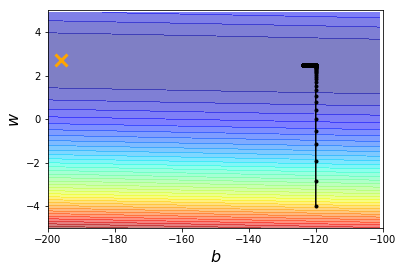

In [12]:
'''
用梯度下降法找使得loss最小的参数值
'''
b = -120 # initial bias
w = -4 # initial weight
lr = 0.0000001 # learning rate
interation = 100000

# store initial valuses for plotting
b_history = [b]
w_history = [w]

# 迭代
for i in range(interation):
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        # 将所有测试数据产生的梯度求和
        b_grad = b_grad + 2.0 * (y_data[n] - b - w*x_data[n]) * (-1.0)
        w_grad = w_grad + 2.0 * (y_data[n] - b - w*x_data[n]) * (-x_data[n])
    # 更新参数 w b
    b = b - lr * b_grad
    w = w - lr * w_grad
    
    # store parameters for plotting
    b_history.append(b)
    w_history.append(w)
    
# 画图
plt.contourf(x, y, z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-196], [2.7], "x", ms=12,  markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()

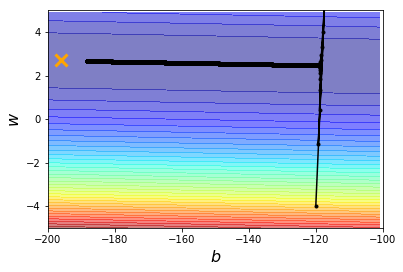

In [18]:
'''
对w和b使用不同的learning rate, 简单法
'''
b = -120 # initial bias
w = -4 # initial weight
lr = 0.1 # learning rate
interation = 100000

# store initial valuses for plotting
b_history = [b]
w_history = [w]

# 迭代
for i in range(interation):
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        # 将所有测试数据产生的梯度求和
        b_grad = b_grad + 2.0 * (y_data[n] - b - w*x_data[n]) * (-1.0)
        w_grad = w_grad + 2.0 * (y_data[n] - b - w*x_data[n]) * (-x_data[n])
    
    lr_b = 0.0001
    lr_w = 0.000001
    # 更新参数 w b
    b = b - lr_b * b_grad
    w = w - lr_w * w_grad
    
    # store parameters for plotting
    b_history.append(b)
    w_history.append(w)
    
# 画图
plt.contourf(x, y, z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
# 前面遍历的时候精度为[1, 0.1] 时无法得到最优解
plt.plot([-196], [2.7], "x", ms=12,  markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()

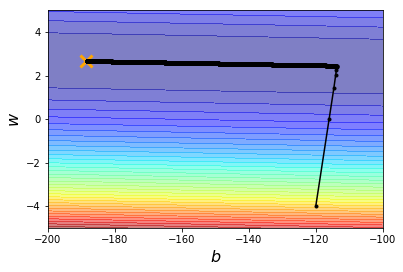

In [36]:
'''
对w和b使用不同的learning rate， ada法
'''
b = -120 # initial bias
w = -4 # initial weight
lr = 4 # learning rate
interation = 100000

# store initial valuses for plotting
b_history = [b]
w_history = [w]
lr_b = 0.0
lr_w = 0.0
# 迭代
for i in range(interation):
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        # 将所有测试数据产生的梯度求和
        b_grad = b_grad + 2.0 * (y_data[n] - b - w*x_data[n]) * (-1.0)
        w_grad = w_grad + 2.0 * (y_data[n] - b - w*x_data[n]) * (-x_data[n])
    

    lr_b = lr_b + b_grad ** 2 # 势能累积
    lr_w = lr_w + w_grad ** 2
    # 更新参数 w b
    b = b - lr/np.sqrt(lr_b) * b_grad
    w = w - lr/np.sqrt(lr_w) * w_grad
    
    # store parameters for plotting
    b_history.append(b)
    w_history.append(w)
    
# 画图
plt.contourf(x, y, z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.6], [2.67], "x", ms=12,  markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()